In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

TypeError: Image data of dtype object cannot be converted to float

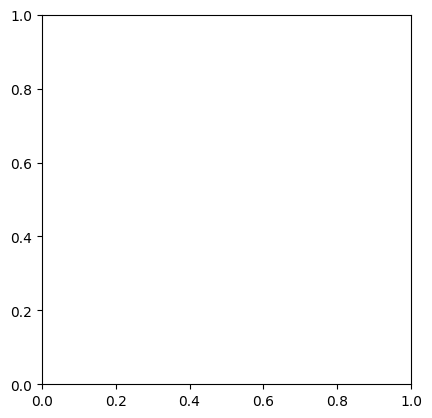

In [5]:
cat_img = cv2.imread('CATS_DOGS\\CATS_DOGS\\train\\CAT\\1.jpg', 0)
# cat_img = cv2.cvtColor(cat_img, cv2.COLOR_BGR2RGB)
plt.imshow(cat_img)

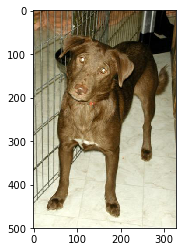

In [5]:
dog_img = cv2.imread('CATS_DOGS/CATS_DOGS/train/DOG/1.jpg')
dog_img = cv2.cvtColor(dog_img, cv2.COLOR_BGR2RGB)
plt.imshow(dog_img)

## Image Preprocessing as every image is of different shape

In [10]:
from keras.preprocessing.image import ImageDataGenerator

img_gen = ImageDataGenerator(rotation_range = 30, # Rotates the image in range of 0-30 deg
                             width_shift_range = 0.1, # Stretches Images width_wise
                             height_shift_range = 0.1, # Stretches Images height_wise
                             rescale = 1/255, # Performs normalization and rescales img to same scale
                             shear_range = 0.2, # Crops the image 20% to avoid unecessary info
                             zoom_range = 0.2, # Zoom in the image
                             horizontal_flip = True, 
                             fill_mode = 'nearest'
                            )

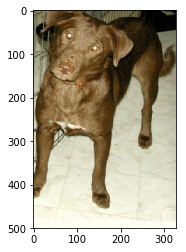

In [15]:
plt.imshow(img_gen.random_transform(dog_img))

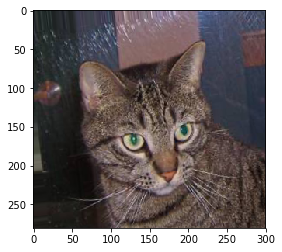

In [20]:
plt.imshow(img_gen.random_transform(cat_img))

In [21]:
img_gen.flow_from_directory('CATS_DOGS/CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


In [27]:
inp_shape = (180,180,3)

## Building the neural network

In [22]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout

In [28]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (4,4), input_shape = inp_shape, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = inp_shape, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = inp_shape, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation(activation = 'relu'))

model.add(Dropout(rate = 0.5))  ## HELPS TO REDUCE OVERFITTING (0.5 -> 50% neurons randomly turned off during training)

model.add(Dense(1)) ## OUTPUT LAYER HAVING BINARY CLASS
model.add(Activation('sigmoid'))

model.compile(loss= 'binary_crossentropy', 
             optimizer = 'adam',
             metrics = ['accuracy']
            )

In [29]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 177, 177, 32)      1568      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 88, 88, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 86, 86, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 41, 41, 64)        36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 20, 20, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 25600)             0         
__________

## Training the network

In [31]:
batch_size = 16

train_img_gen = img_gen.flow_from_directory('CATS_DOGS/CATS_DOGS/train', 
                                            target_size = inp_shape[:2],
                                            batch_size = batch_size,
                                            class_mode = 'binary') 


Found 18743 images belonging to 2 classes.


In [32]:
test_img_gen = img_gen.flow_from_directory('CATS_DOGS/CATS_DOGS/test',
                                           target_size = inp_shape[:2],
                                           batch_size = batch_size, 
                                           class_mode = 'binary')

Found 6251 images belonging to 2 classes.


In [33]:
train_img_gen.class_indices

{'CAT': 0, 'DOG': 1}

## Since it's a huge dataset we will train the model for only 1 epoch just to see how it works. later we will import our pre-trained model

In [ ]:
result = model.fit_generator(train_img_gen, 
                             epochs = 1, 
                             steps_per_epoch = 100, # 150 images per epoch
                             validation_data = test_img_gen, 
                             validation_steps = 12)

In [ ]:
results.history['acc']

## Since the accuracy was really low we will load the pre-trained model 

In [37]:
from keras.models import load_model

better_model = load_model('cat_dog_100epochs.h5')

In [48]:
from keras.preprocessing import image

test_img = image.load_img('DATA/00-puppy.jpg', target_size = (150,150))
test_img = image.img_to_array(test_img)
test_img.shape

(150, 150, 3)

In [49]:
test_img = np.expand_dims(test_img, axis = 0)
test_img.shape

(1, 150, 150, 3)

In [50]:
test_img = test_img/255

In [51]:
better_model.predict_classes(test_img)

array([[1]])

In [52]:
better_model.predict(test_img)

array([[0.94231945]], dtype=float32)